## 1-1. 문제 정의하기

## 1-2. 데이터 가져오기

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
train = pd.read_csv('train.csv', index_col='PassengerId')
test = pd.read_csv('test.csv', index_col='PassengerId')

train.head() #train.tail()을 하게 되면, 마지막 데이터를 확인합니다.

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

## 2-1. 데이터 기본 정보

In [3]:
train.shape, test.shape

((891, 11), (418, 10))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## 2-2. 결측치 처리하기

In [6]:
## 결측치 처리
sex_mean = train.groupby('Sex')['Age'].mean()

train.loc[(train["Sex"] == 'female') & (train["Age"].isnull()), "Age"] = int(sex_mean[0])
train.loc[(train["Sex"] == 'male') & (train["Age"].isnull()), "Age"] = int(sex_mean[1])

train['Age'] = train['Age'].apply(lambda x:round(x))

train.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex  Age  \
PassengerId                                                                   
1                                      Braund, Mr. Owen Harris    male   22   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38   
3                                       Heikkinen, Miss. Laina  female   26   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35   
5                                     Allen, Mr. William Henry    male   35   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [7]:
train.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
C22 C26        3
E101           3
              ..
D11            1
D45            1
C118           1
D56            1
C103           1
Name: Cabin, Length: 147, dtype: int64

In [8]:
# 맨 앞의 알파벳 추출하기
train['Cabin'] = train['Cabin'].fillna('N') #결측치를 'N'으로 채우라는 명령
train['Cabin'] = train['Cabin'].apply(lambda x:x[0]) #해당 값을 0번째 값으로만 채우라는 명령

train.head() #제대로 반영이 되었는지 20개만 출력을 해봅니다.

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex  Age  \
PassengerId                                                                   
1                                      Braund, Mr. Owen Harris    male   22   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38   
3                                       Heikkinen, Miss. Laina  female   26   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35   
5                                     Allen, Mr. William Henry    male   35   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500     N        S  
2                1      0          PC 17599  71.2833     C        C  
3                0      0  STON/O2. 3101282   7.9250     N        S  
4                1      0            113803  53.1000     C        S  
5                0      0            373450   8.0500     N        S

In [9]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
train['Embarked'].isnull().sum()

2

In [11]:
train['Embarked'] = train['Embarked'].fillna('S')

## 2-3. 생존자, 사망자 인원 수 출력하기

In [12]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
train["Survived_label"] = train["Survived"].replace(0, "Dead").replace(1, "Survived")

train[['Survived','Survived_label']].head()

Survived Survived_label
PassengerId                         
1                   0           Dead
2                   1       Survived
3                   1       Survived
4                   1       Survived
5                   0           Dead

## 2-4. 전체 생존율 구하기

In [14]:
train['Survived_label'].value_counts()

Dead        549
Survived    342
Name: Survived_label, dtype: int64

In [15]:
temp = train['Survived_label'].value_counts()
survival_rate = temp[1]/(temp[0] + temp[1])*100

print(f"생존율은 {survival_rate:.1f}% 입니다.")

생존율은 38.4% 입니다.


## 2-5. 생존자 시각화하기

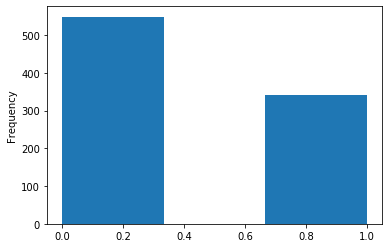

In [43]:
train['Survived'].plot(kind='hist', bins=3)

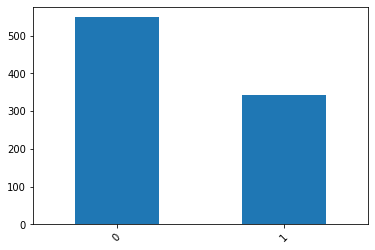

In [49]:
train['Survived'].value_counts().plot(kind='bar', rot='45')

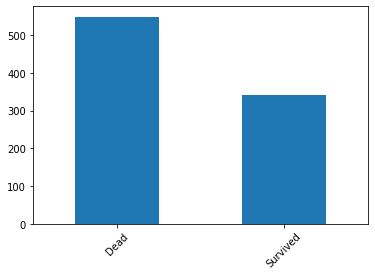

In [53]:
train['Survived_label'].value_counts().plot(kind='bar', rot='45')

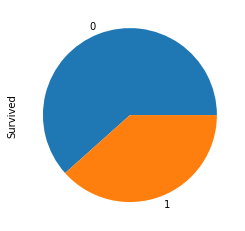

In [51]:
train['Survived'].value_counts().plot(kind='pie')

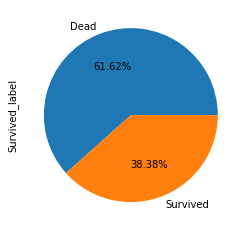

In [54]:
train['Survived_label'].value_counts().plot(kind='pie', autopct='%1.2f%%')

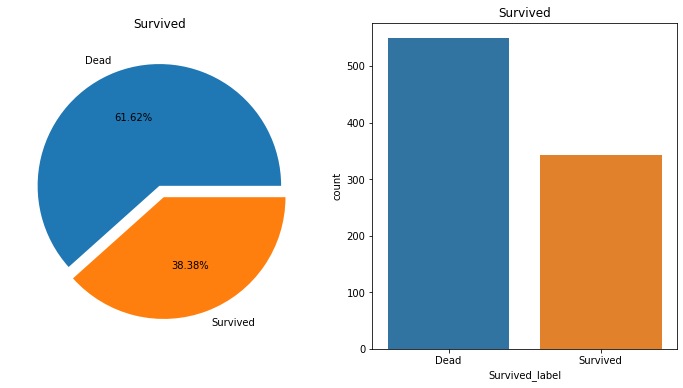

In [16]:
f,ax=plt.subplots(1,2,figsize=(12,6))

train['Survived_label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived_label',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

## 2-6. 객실 데이터 정리 및 시각화하기

In [55]:
train['Pclass_label'] = train["Pclass"].replace(1, 'First Class').replace(2, 'Business').replace(3, 'Economy')

train[['Pclass','Pclass_label']].head()

Pclass Pclass_label
PassengerId                     
1                 3      Economy
2                 1  First Class
3                 3      Economy
4                 1  First Class
5                 3      Economy

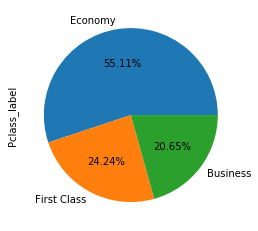

In [57]:
train['Pclass_label'].value_counts().plot(kind='pie', autopct='%1.2f%%')

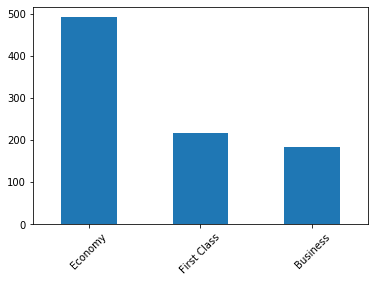

In [58]:
train['Pclass_label'].value_counts().plot(kind='bar', rot='45')

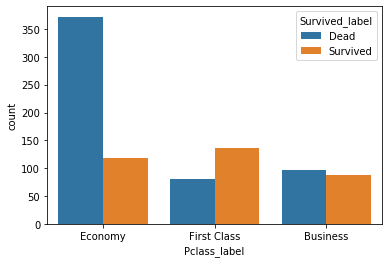

In [59]:
sns.countplot(data=train, x="Pclass_label", hue="Survived_label")

## 2-7. 출발지 데이터 정리 및 시각화하기

In [60]:
train['Embarked_label'] = train['Embarked'].replace('S','Southampton').replace('C','Cherbourg').replace('Q','Queenstown')

train[['Embarked','Embarked_label']].head()

Embarked Embarked_label
PassengerId                        
1                  S    Southampton
2                  C      Cherbourg
3                  S    Southampton
4                  S    Southampton
5                  S    Southampton

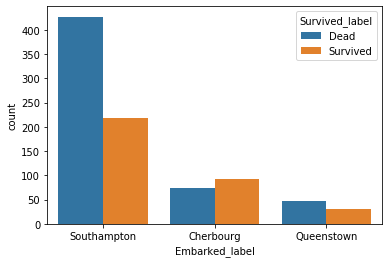

In [61]:
sns.countplot(data=train, x="Embarked_label", hue="Survived_label")

## 3. 데이터 분석

## 3-1 가설 세우기1

In [62]:
train[['Name']].head(15)

Name
PassengerId                                                   
1                                      Braund, Mr. Owen Harris
2            Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                       Heikkinen, Miss. Laina
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                     Allen, Mr. William Henry
6                                             Moran, Mr. James
7                                      McCarthy, Mr. Timothy J
8                               Palsson, Master. Gosta Leonard
9            Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                         Nasser, Mrs. Nicholas (Adele Achem)
11                             Sandstrom, Miss. Marguerite Rut
12                                    Bonnell, Miss. Elizabeth
13                              Saundercock, Mr. William Henry
14                                 Andersson, Mr. Anders Johan
15                        Vestrom, Miss. Hulda Amanda Adolfina

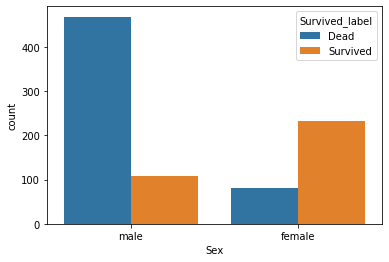

In [63]:
sns.countplot(data=train, x="Sex", hue="Survived_label")
#여기서 가설을 세울 수 있을까요? '여성이 남성보다 살아남았을 것이다!'

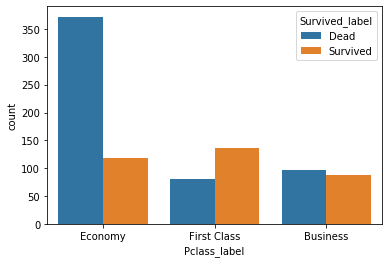

In [64]:
sns.countplot(data=train, x="Pclass_label", hue="Survived_label")

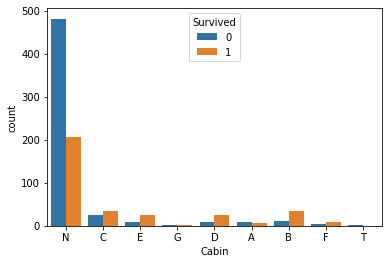

In [65]:
sns.countplot(x='Cabin', hue='Survived', data=train)

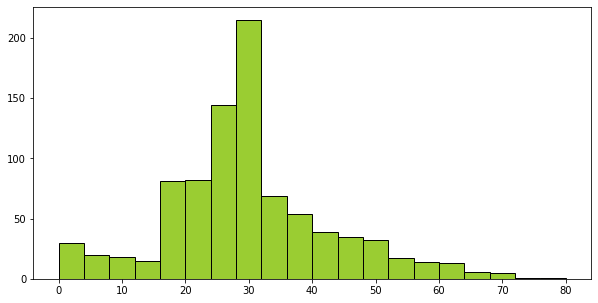

In [66]:
train['Age'].hist(bins=20,figsize=(10,5),grid=False,edgecolor='black',color='yellowgreen');

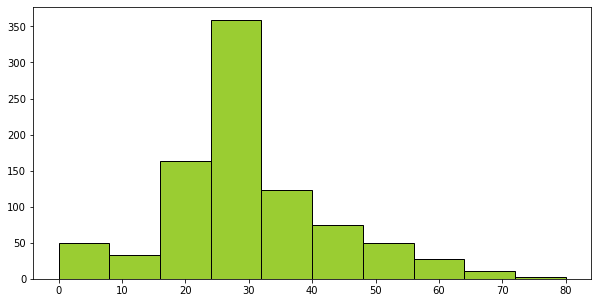

In [67]:
train['Age'].hist(bins=10,figsize=(10,5),grid=False,edgecolor='black',color='yellowgreen');

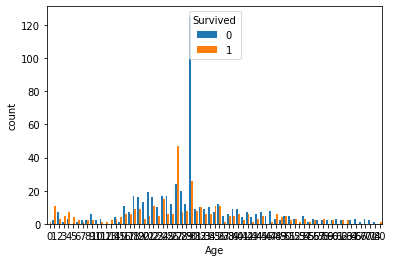

In [74]:
sns.countplot(x='Age', hue='Survived', data=train)

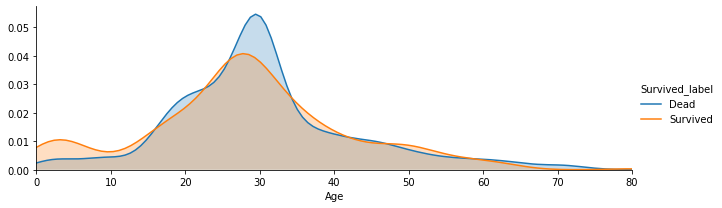

In [75]:
f = sns.FacetGrid(train, hue='Survived_label', aspect=3)
f.map(sns.kdeplot,'Age',shade=True)
f.set(xlim=(0,train['Age'].max()))
f.add_legend()

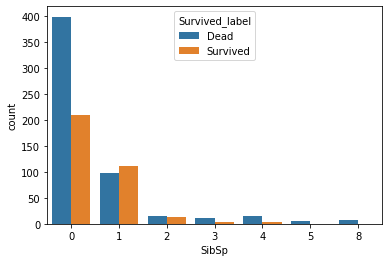

In [76]:
sns.countplot(data=train, x="SibSp", hue="Survived_label")

## 3-2 가설 세우기2

In [77]:
train.loc[(train["SibSp"] == 0 ) & (train["Parch"] == 0),"Single"] = 'Single'
train.loc[(train["SibSp"] != 0 ) | (train["Parch"] != 0),"Single"] = 'Family'

train[["SibSp","Parch","Single"]].head(5)

SibSp  Parch  Single
PassengerId                      
1                1      0  Family
2                1      0  Family
3                0      0  Single
4                1      0  Family
5                0      0  Single

In [78]:
pd.pivot_table(data=train, index="Single", values="Survived")

Survived
Single          
Family  0.505650
Single  0.303538

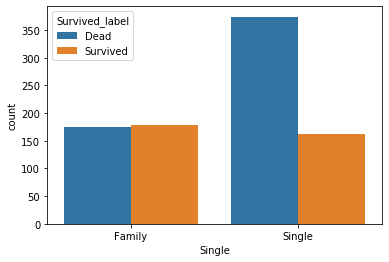

In [80]:
sns.countplot(data=train, x="Single", hue="Survived_label")

In [81]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
train[["SibSp", "Parch", "FamilySize"]].head(10)

SibSp  Parch  FamilySize
PassengerId                          
1                1      0           2
2                1      0           2
3                0      0           1
4                1      0           2
5                0      0           1
6                0      0           1
7                0      0           1
8                3      1           5
9                0      2           3
10               1      0           2

In [82]:
pd.pivot_table(train, index="FamilySize", values="Survived")

Survived
FamilySize          
1           0.303538
2           0.552795
3           0.578431
4           0.724138
5           0.200000
6           0.136364
7           0.333333
8           0.000000
11          0.000000

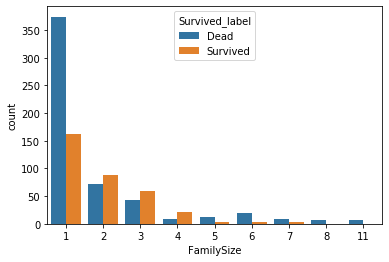

In [83]:
sns.countplot(data=train, x="FamilySize", hue="Survived_label")

In [84]:
train.loc[train["FamilySize"] == 1, "FamilySize_label"] = "Single"
train.loc[(train["FamilySize"] > 1) & (train["FamilySize"] < 5), "FamilySize_label"] = "Nuclear"
train.loc[train["FamilySize"] >= 5, "FamilySize_label"] = "Big"

train[["FamilySize", "FamilySize_label"]].head(10)

FamilySize FamilySize_label
PassengerId                             
1                     2          Nuclear
2                     2          Nuclear
3                     1           Single
4                     2          Nuclear
5                     1           Single
6                     1           Single
7                     1           Single
8                     5              Big
9                     3          Nuclear
10                    2          Nuclear

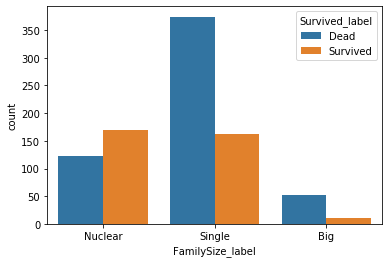

In [85]:
sns.countplot(data=train, x="FamilySize_label", hue="Survived_label")